In [1]:
import pandas as pd
import numpy as np
import seaborn as sms
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'D:\Downloads\Bitcoin/bitcoin_price_Training - Training.csv')

In [5]:
df.head(4)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

###### The columns shows that its a time series date  

In [7]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [10]:
# Data Pre-Processing

df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [12]:
# covert data type of 'Date'

df['Date'] = df['Date'].astype('datetime64[ns]')

In [13]:
df['Date']

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [14]:
# checking for null values

df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [15]:
# checking for duplicate values

df.duplicated().sum()

0

In [16]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [17]:
df.sort_index(ascending = False)

,Date,Open,High,Low,Close,Volume,Market Cap
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


# EDA

### Analysing change in price of the Bitcoin overtime 

In [22]:
bitcoin_data = df.sort_index(ascending = False).reset_index()

In [25]:
bitcoin_data.drop('index' , axis = 1, inplace = True)

In [27]:
bitcoin_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

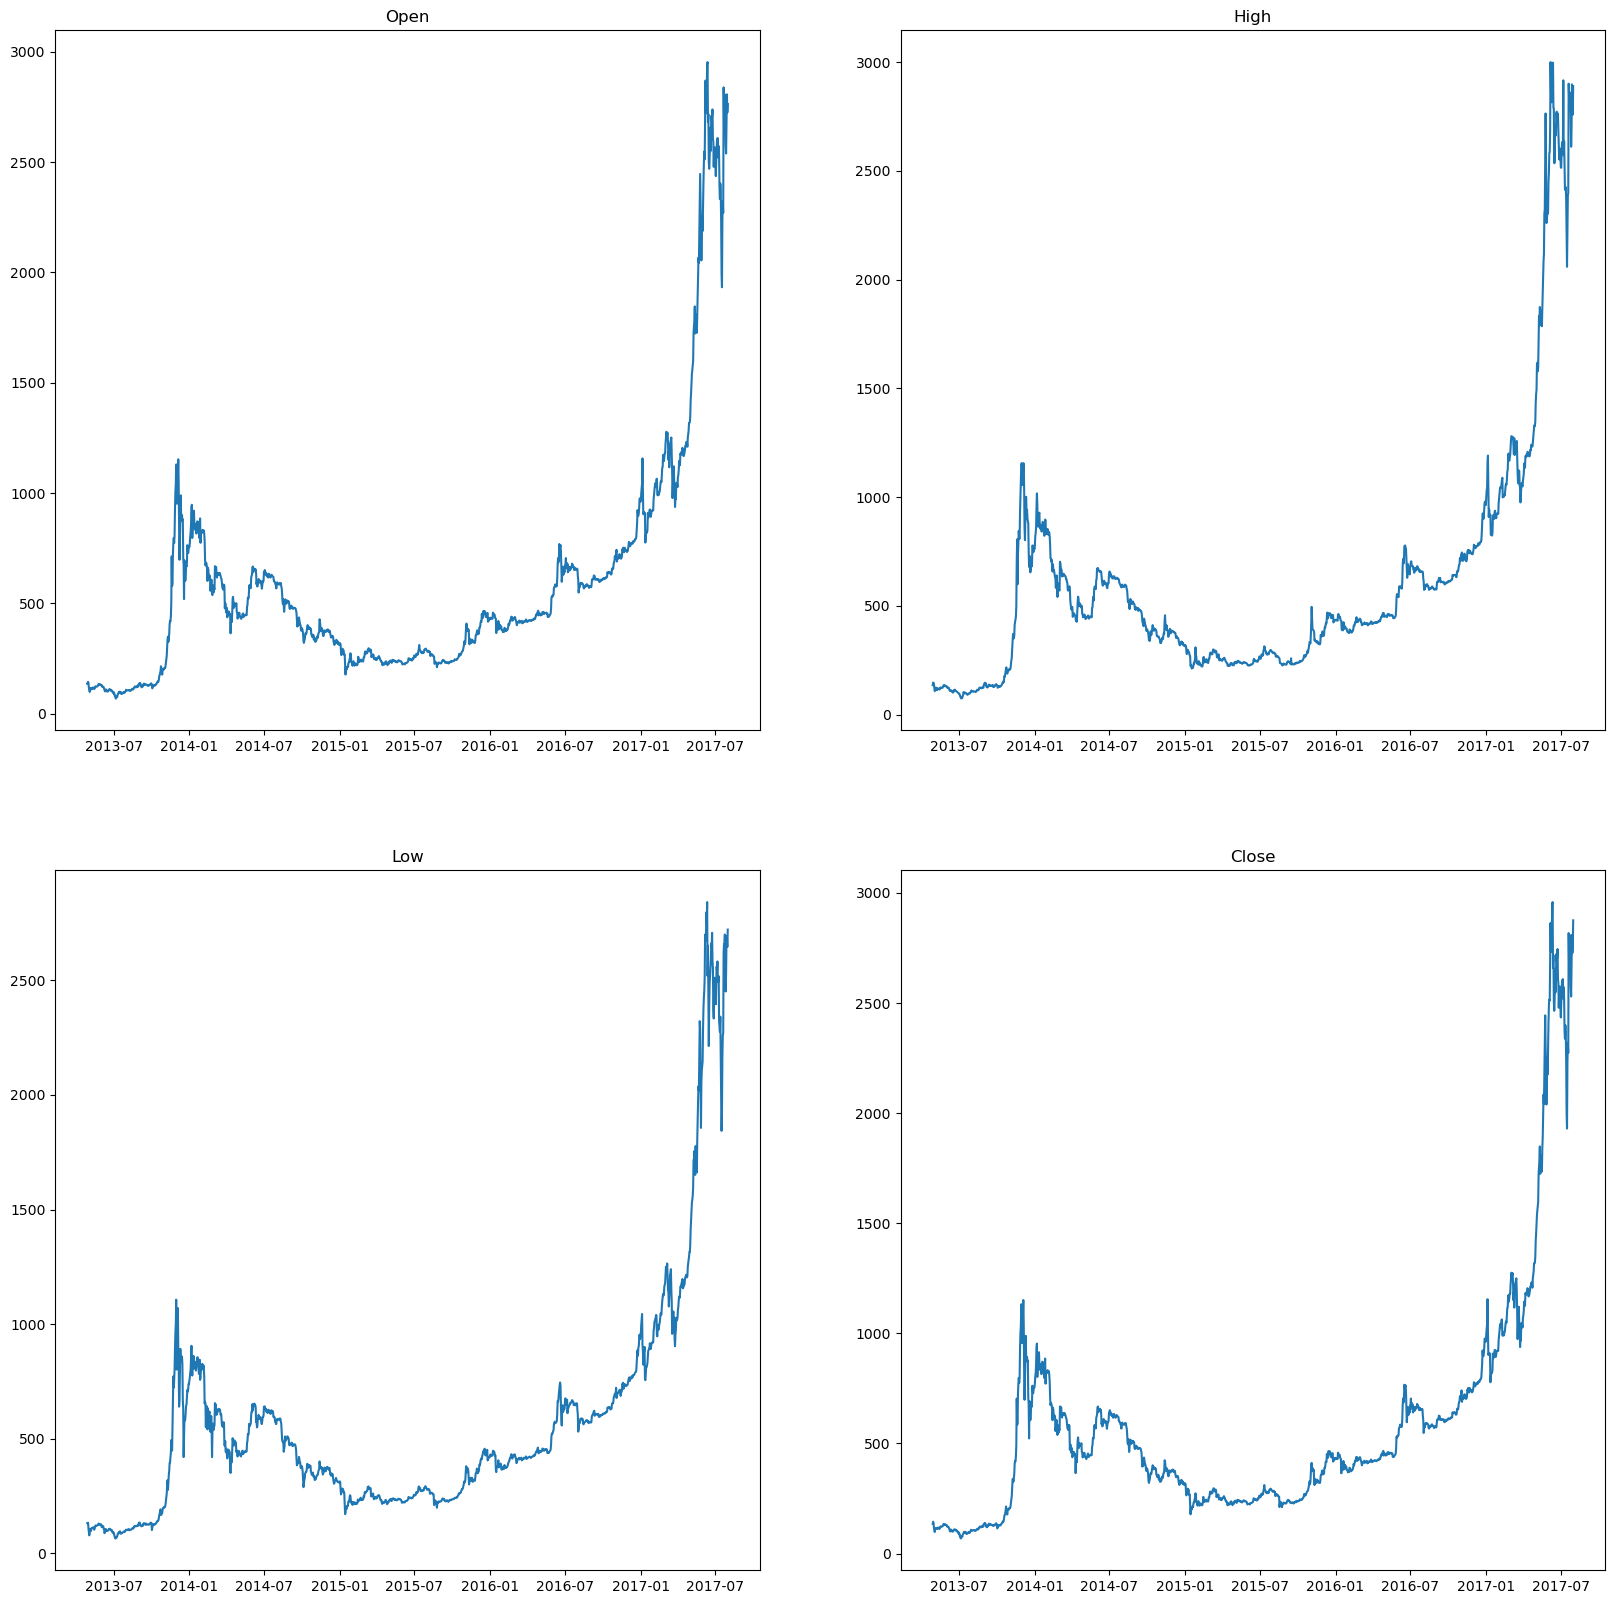

In [29]:
#creating a plot for the analysis

plt.figure(figsize = (20,20))

for index , col in enumerate(['Open', 'High', 'Low', 'Close'] , 1):
    plt.subplot(2,2,index)
    plt.plot(df['Date'] , df[col])
    plt.title(col)

#### From the above plot, we can see that there is hike in change in price of Bitcoin between 2017-01 to 2017-07 

### Analysing open, close, high and low value of Bitcoin 

In [31]:
!pip install chart_studio
!pip install plotly

In [34]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot

In [35]:
init_notebook_mode(connected = True)

In [40]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [43]:
!pip install jupyter_contrib_nbextensions

     ---------------------------------------- 23.5/23.5 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 466.9/466.9 kB 2.2 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428802 sha256=8fbbb19146267008d62ab9dd2c82d262f181f92b14fde7772e664960d1aac20a
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\44\a7\44\406684ced6e1131cbfce3391ab8508a39857e215c5498c4e6b
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17498 sha256=fec0e7cee61c1d4e70896dff6287cf0f8eed2266f43fab4110b5e63ac655fd47
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\22\48\07\905faed53d1593772d705f08a979f218f8a6caa91f186895e4
S

In [47]:
trace = go.Candlestick(x =df['Date'],
              high =df['High'],
              low =df['Low'],
              open =df['Open'],
              close =df['Close'])

In [57]:
candle_date = [trace]
layout = {
    'title' : 'Bitcoin Historical Prices',
    'xaxis': {'title': 'Dates'}
}

In [58]:
plt.figure(figsize = (5,5))
go.Figure(candle_date, layout)

<Figure size 500x500 with 0 Axes>

#### From the above candlestick we can get the information of each day price of Bitcoin

### Analysing closing price

In [62]:

bitcoin_data['Close']

0        134.21
1        144.54
2        139.00
3        116.99
4        105.21
         ...   
1551    2671.78
1552    2809.01
1553    2726.45
1554    2757.18
1555    2875.34
Name: Close, Length: 1556, dtype: float64

In [64]:
bitcoin_date.set_index('Date', inplace =True)

<Axes: >

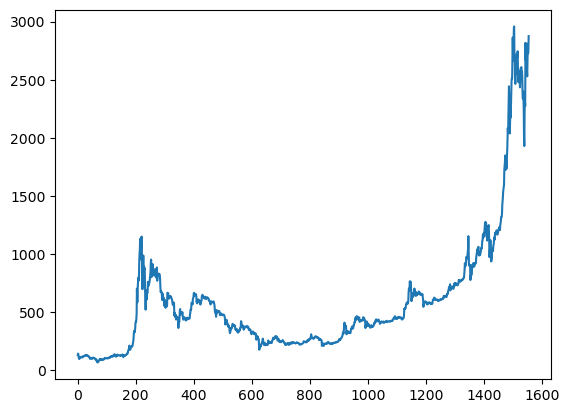

In [65]:
bitcoin_data['Close'].plot()

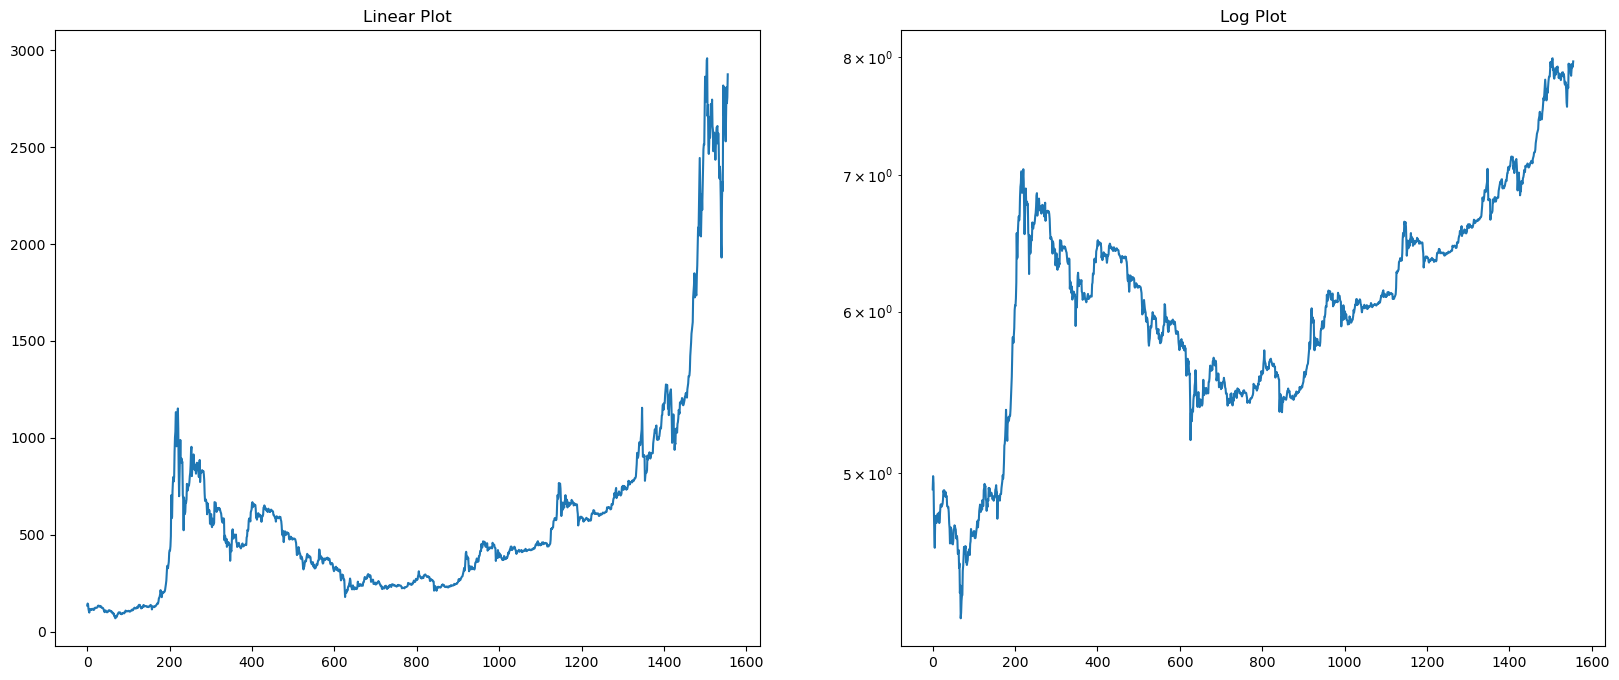

In [73]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
bitcoin_data['Close'].plot()
plt.title('Linear Plot')


plt.subplot(1,2,2)
np.log1p(bitcoin_data['Close']).plot()
plt.title('Log Plot')
plt.yscale('log')

### Analysis on closing Price on Yearly , Quarterly & monthly basis 

In [76]:
bitcoin_data.set_index('Date' , inplace = True)


In [77]:
bitcoin_date.head(5)

,index,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2013-04-28,1555,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,1554,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,1553,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,1552,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,1551,116.38,125.60,92.28,105.21,-,"1,292,190,000"


<Axes: xlabel='Date'>

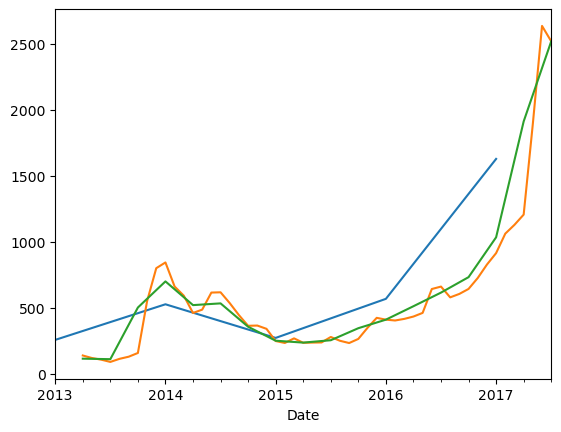

In [83]:
bitcoin_data['Close'].resample('Y').mean().plot() 
bitcoin_data['Close'].resample('M').mean().plot()
bitcoin_data['Close'].resample('Q').mean().plot()


<Axes: xlabel='Date'>

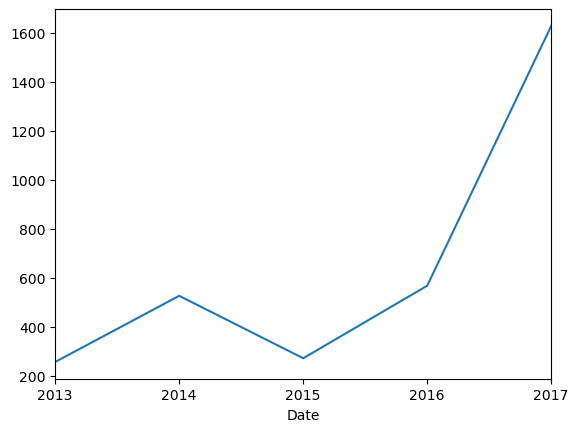

In [84]:
bitcoin_data['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

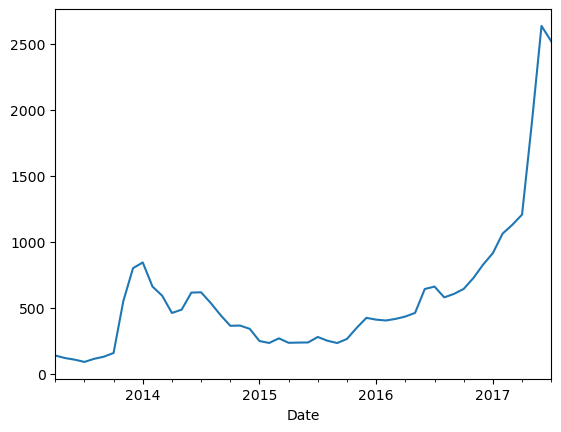

In [85]:
bitcoin_data['Close'].resample('M').mean().plot()

<Axes: xlabel='Date'>

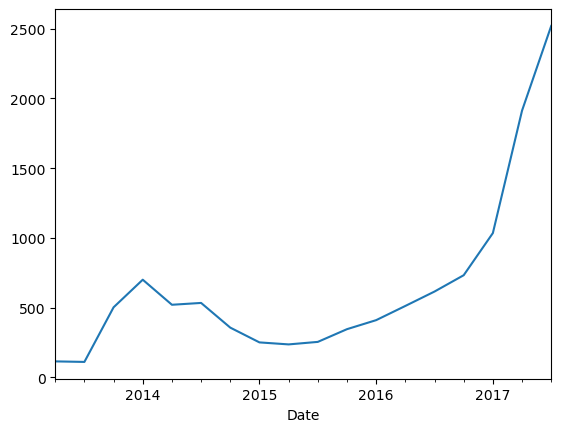

In [86]:
bitcoin_data['Close'].resample('Q').mean().plot()


# Conclusion

### The data analysis of Bitcoin between the years 2013 and 2017 reveals fascinating insights into its price trends and market behavior. The year 2017 stands out as a significant milestone for Bitcoin, as it witnessed the cryptocurrency reaching its highest price to date. The surge in Bitcoin's value during this period can be attributed to various factors, including increased investor interest, growing adoption, and positive market sentiment. 